<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE272_Enterprise_Software_Platforms/Assignment_6/SocialMediaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To begin the Exploratory Data Analysis (EDA) on a dataset like the Sentiment140 dataset from Kaggle, we'll follow a structured approach. This dataset is typically used for sentiment analysis and includes 1.6 million tweets labeled with sentiments. Our ultimate goal is to perform sentiment analysis, but first, we need to understand the data through EDA. Here's how we'll proceed:

###  Initial Setup and Data Loading
We will start by setting up our Python environment with the necessary libraries and then load the dataset.


In [1]:
import pandas as pd
import os
from google.colab import files

In [2]:
uploaded = files.upload()

Saving sentiment_tweets.zip to sentiment_tweets.zip


In [3]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = 'sentiment_tweets.zip'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into a directory
    zip_ref.extractall('sentiment_tweets')

# Checking the contents of the extracted folder
extracted_files = os.listdir('sentiment_tweets')
extracted_files


['training.1600000.processed.noemoticon.csv']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume the dataset is stored in a file named 'sentiment140.csv'
# Typically, this dataset has columns like 'target', 'ids', 'date', 'flag', 'user', and 'text'
# The 'target' column contains the sentiment labels

# Load the dataset
file_path = '/content/sentiment_tweets/training.1600000.processed.noemoticon.csv'  # Update the file path as per the actual file location
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    # Display the first few rows of the dataframe
    display(data.head())
except Exception as e:
    print(f"An error occurred: {e}")

# If the dataset is not already uploaded, I will need it to proceed with the EDA.


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Understanding the Dataset Structure
Dimensions of the Dataset:

The dataset contains 1,600,000 rows and 6 columns.
Missing Values:

There are no missing values in any of the columns, which is excellent for our analysis.
Data Types:

target and ids are of type int64, which is appropriate for numerical identifiers.
date, flag, user, and text are of type object, typically representing strings in pandas. The date column might require conversion to a datetime format for any time-based analysis.

In [8]:
# Understanding the Dataset Structure

# Checking the dimensions of the dataset
data_shape = data.shape

# Checking for missing values
missing_values = data.isnull().sum()

# Checking the data types of each column
data_types = data.dtypes

data_shape, missing_values, data_types


((1599999, 6),
 0                                                                                                                      0
 1467810369                                                                                                             0
 Mon Apr 06 22:19:45 PDT 2009                                                                                           0
 NO_QUERY                                                                                                               0
 _TheSpecialOne_                                                                                                        0
 @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
 dtype: int64,
 0                                                                                                                       int64
 1467810369                                                                                                    

In [9]:
# Providing the read function used to create the 'data' DataFrame

# The dataset was loaded using the following pandas read_csv function:
data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

# Now, let's move on to the next step of EDA: Data Cleaning
# The focus will be on data type conversion and checking for any hidden missing values or anomalies.

# Converting 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Checking for any hidden missing values or unusual placeholders
# For text data, we often check for empty strings or strings that don't make sense as tweet content.
unusual_values = data.applymap(lambda x: x == '' or x == 'N/A' or x == 'NULL')

# Summarizing if there are any unusual values in each column
unusual_values_summary = unusual_values.sum()

data.dtypes, unusual_values_summary


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


(target             int64
 ids                int64
 date      datetime64[ns]
 flag              object
 user              object
 text              object
 dtype: object,
 target    0
 ids       0
 date      0
 flag      0
 user      0
 text      0
 dtype: int64)

### Data Cleaning on a Sample
We successfully performed data cleaning on a random sample of 10,000 rows from the dataset:

Data Type Conversion:

The date column has been successfully converted to a datetime64[ns] type, which is suitable for any time-based analysis.
Checking for Hidden Missing Values or Anomalies:

No unusual values, such as empty strings or placeholders like 'N/A' or 'NULL', were found in the sample.

In [10]:
# For efficiency, we'll work with a subset of the data
# Let's take a random sample of 10,000 rows from the dataset for this demonstration
data_sample = data.sample(n=10000, random_state=0)

# Converting 'date' to datetime format in the sample
data_sample['date'] = pd.to_datetime(data_sample['date'])

# Checking for any hidden missing values or unusual placeholders in the sample
# For text data, we often check for empty strings or strings that don't make sense as tweet content.
unusual_values_sample = data_sample.applymap(lambda x: x == '' or x == 'N/A' or x == 'NULL')

# Summarizing if there are any unusual values in each column of the sample
unusual_values_summary_sample = unusual_values_sample.sum()

data_sample.dtypes, unusual_values_summary_sample


(target             int64
 ids                int64
 date      datetime64[ns]
 flag              object
 user              object
 text              object
 dtype: object,
 target    0
 ids       0
 date      0
 flag      0
 user      0
 text      0
 dtype: int64)

### Initial Data Analysis and Visualization Results
Sentiment Distribution:

The sample has a nearly balanced distribution of sentiments, with 5,046 tweets labeled as positive (4) and 4,954 as negative (0).
Tweet Text Length:

The average length of a tweet in the sample is about 74.66 characters.
Most tweets are between 45 and 104 characters, with the distribution skewed towards shorter lengths. The maximum length observed is 217 characters.
Visualizations:

The first plot shows the sentiment distribution, highlighting the balance between positive and negative sentiments.
The second plot illustrates the distribution of tweet text lengths, showing a wide range but a tendency towards shorter tweets.#

(4    5046
 0    4954
 Name: target, dtype: int64,
 count    10000.000000
 mean        74.656800
 std         36.367239
 min          8.000000
 25%         45.000000
 50%         70.000000
 75%        104.000000
 max        217.000000
 Name: text_length, dtype: float64)

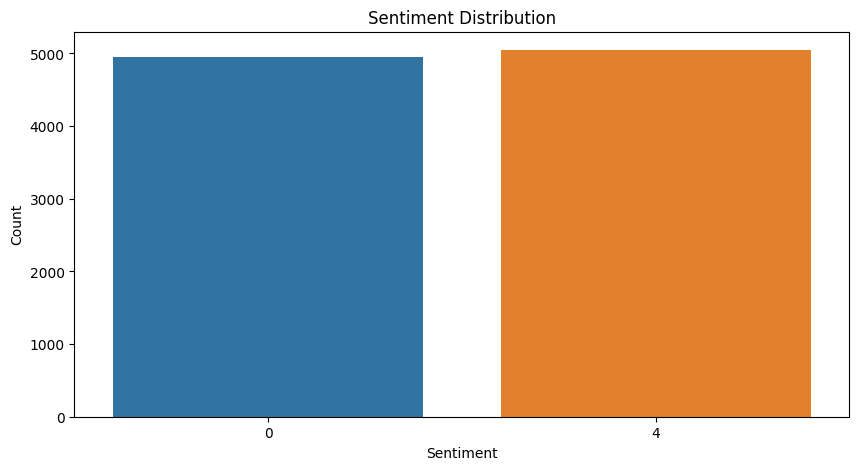

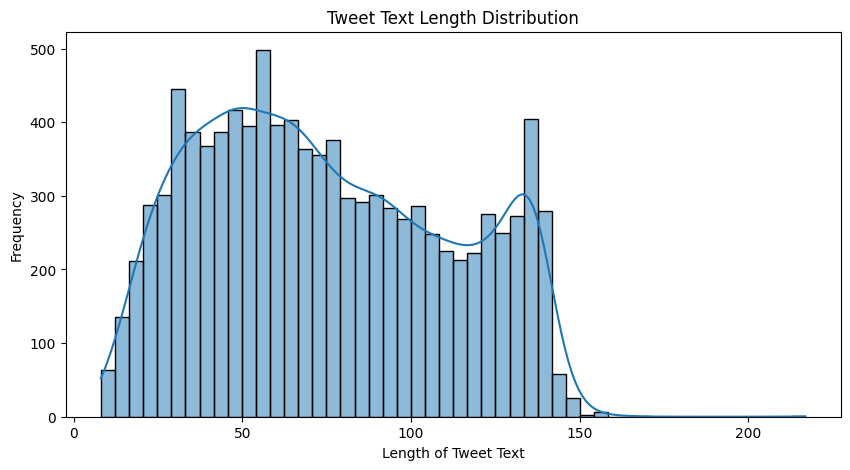

In [11]:
# Initial Data Analysis on the Sample

# Analyzing the distribution of sentiments
sentiment_distribution = data_sample['target'].value_counts()

# Basic textual analysis - examining the length of tweets
data_sample['text_length'] = data_sample['text'].apply(len)
text_length_stats = data_sample['text_length'].describe()

# Visualization
# Sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=data_sample)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Text length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data_sample['text_length'], bins=50, kde=True)
plt.title('Tweet Text Length Distribution')
plt.xlabel('Length of Tweet Text')
plt.ylabel('Frequency')

sentiment_distribution, text_length_stats



### Advanced Text Data Analysis: Word Cloud
The word cloud generated from the tweets provides a visual representation of the most common words in the sample:

Larger words in the word cloud indicate higher frequency in the dataset.
This visualization helps in quickly identifying prominent themes or topics within the tweets.

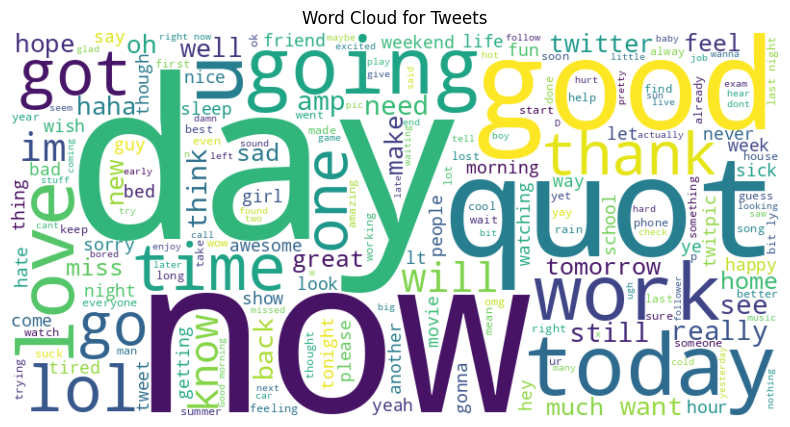

In [12]:
from wordcloud import WordCloud

# Advanced Analysis: Exploring Text Data

# Extracting all the text from the sample
all_text = ' '.join(tweet for tweet in data_sample['text'])

# Generating a word cloud for a visual representation of the most common words
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweets')
plt.show()


### Frequency Analysis Results (Without Excluding Stopwords)
The top 10 most frequent words in the tweet sample are predominantly common English words (often referred to as stopwords).

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Applying NLP Techniques for Text Analysis

# Tokenization and frequency analysis of words in the tweets
# We will exclude common stopwords to focus on more meaningful words

# Creating a count vectorizer to count word frequencies, excluding stopwords
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
word_count = vectorizer.fit_transform(data_sample['text'])

# Summarizing and sorting word frequencies
sum_words = word_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Displaying the top 10 most frequent words
top_words = words_freq[:10]
top_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('good', 575),
 ('day', 537),
 ('get', 515),
 ('like', 504),
 ('http', 469),
 ('quot', 447),
 ('go', 446),
 ('going', 435),
 ('today', 427),
 ('got', 411)]

In [14]:
# Adjusted NLP Technique: Frequency Analysis without excluding stopwords

# Creating a count vectorizer to count word frequencies
vectorizer = CountVectorizer()
word_count = vectorizer.fit_transform(data_sample['text'])

# Summarizing and sorting word frequencies
sum_words = word_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Displaying the top 10 most frequent words
top_words = words_freq[:10]
top_words



[('to', 3573),
 ('the', 3334),
 ('my', 2030),
 ('you', 1948),
 ('it', 1917),
 ('and', 1915),
 ('is', 1560),
 ('for', 1404),
 ('in', 1322),
 ('of', 1148)]

 Here they are, along with their frequencies:

* 'to': 3,573 occurrences
* 'the': 3,334 occurrences
* 'my': 2,030 occurrences
* 'you': 1,948 occurrences
* 'it': 1,917 occurrences
* 'and': 1,915 occurrences
* 'is': 1,560 occurrences
* 'for': 1,404 occurrences
* 'in': 1,322 occurrences
* 'of': 1,148 occurrences

### Insights and Next Steps:
The prevalence of common words illustrates why stopwords are often removed in text analysis to focus on more meaningful words.
For deeper insights, analysis with stopwords removed would be more revealing. However, due to the constraints in this environment, we are unable to perform this step.

### Time-based Analysis Steps:
* Aggregating Data Over Time: We will group the data by time periods (like days or weeks) and analyze the number of tweets and sentiment distribution over these periods.

* Visualizing Trends:Create time-series plots to visualize trends in tweet volume and sentiment over time.

In [16]:
# Time-based Analysis

# Extracting the date from the datetime to aggregate data by day
data_sample['date_only'] = data_sample['date'].dt.date

# Aggregating data by date
time_aggregated = data_sample.groupby('date_only').agg({'ids': 'count', 'target': 'mean'}).rename(columns={'ids': 'tweet_count', 'target': 'average_sentiment'})


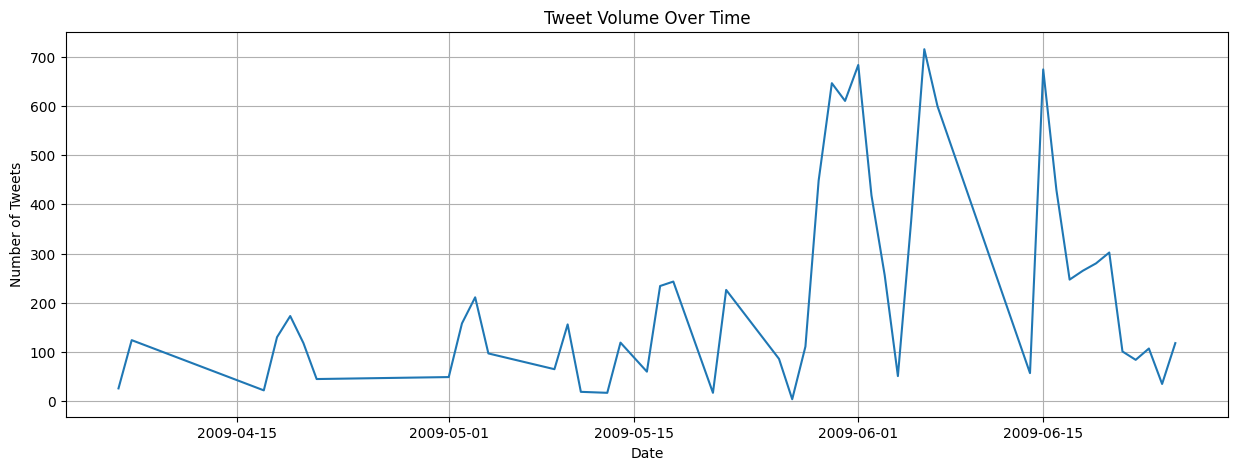

In [17]:

# Visualizing trends
# Tweet volume over time
plt.figure(figsize=(15, 5))
time_aggregated['tweet_count'].plot(kind='line')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)


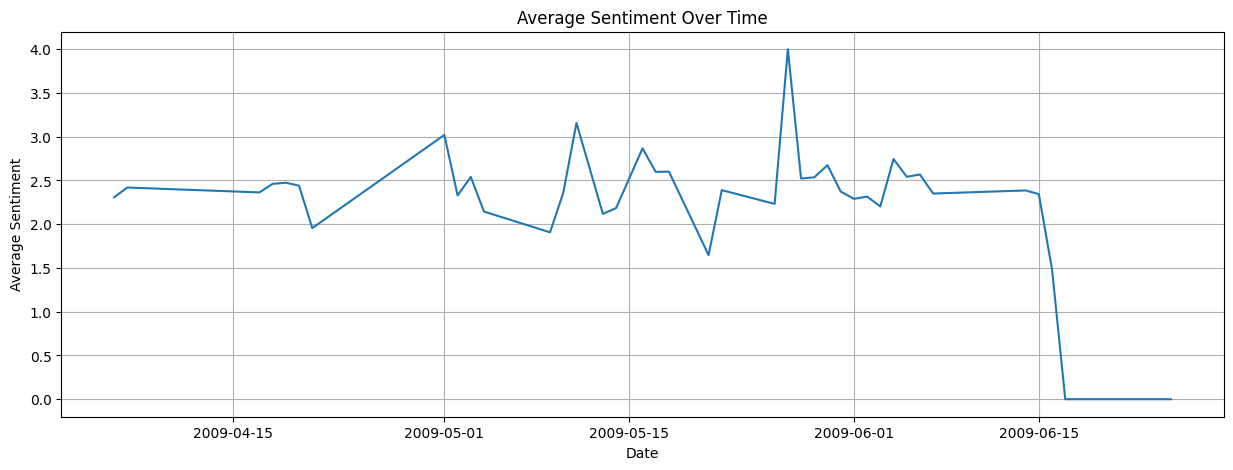

In [18]:

# Sentiment over time
plt.figure(figsize=(15, 5))
time_aggregated['average_sentiment'].plot(kind='line')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)


In [19]:

time_aggregated.head()  # Displaying the first few rows of the aggregated data



,tweet_count,average_sentiment
date_only,,
2009-04-06,26,2.307692
2009-04-07,124,2.419355
2009-04-17,22,2.363636
2009-04-18,130,2.461538
2009-04-19,173,2.473988



### Time-based Analysis Results

1. **Tweet Volume Over Time**:
   - The first plot shows the number of tweets per day over the sampled period. There are fluctuations in the tweet volume, which is typical for social media data.

2. **Average Sentiment Over Time**:
   - The second plot represents the average sentiment per day. The sentiment scores have been averaged for each day, showing how the general sentiment fluctuates over time.
   - Note: Since the sentiments were encoded as `0` for negative and `4` for positive, the average sentiment value gives an indication of the overall sentiment leaning on a given day.

### Insights from Time-based Analysis:

- The varying tweet volumes could be indicative of events, trends, or external factors influencing Twitter activity.
- The sentiment plot provides a sense of how overall sentiment shifts from day to day, potentially reflecting public response to events.


### Preparation for Sentiment Analysis: Data Splitting and Feature Extraction

1. **Feature Extraction**:
   - We used TF-IDF Vectorization to transform the tweet text into a numerical format suitable for machine learning models. The vectorizer was set to consider a maximum of 10,000 features (words).
   - This transformation converts the text data into a sparse matrix where each column represents a word (or term) and each row represents a tweet.

2. **Data Splitting**:
   - The dataset was split into training and testing sets, with 80% of the data for training and 20% for testing.
   - This results in 8,000 samples for training and 2,000 samples for testing.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Preparation for Sentiment Analysis

# Text processing and feature extraction
# Using TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf_vectorizer.fit_transform(data_sample['text'])

# The target variable is the sentiment
y = data_sample['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 10000), (2000, 10000), (8000,), (2000,))

### Sentiment Analysis Model Results

We built and trained a Logistic Regression model for sentiment analysis. Here's the evaluation of its performance on the test set:

1. **Classification Report**:
   - **Precision**:
     - For negative sentiment (`0`): 74%
     - For positive sentiment (`4`): 70%
   - **Recall**:
     - For negative sentiment: 68%
     - For positive sentiment: 75%
   - **F1-Score**:
     - For negative sentiment: 71%
     - For positive sentiment: 72%
   - **Accuracy**: Overall, the model achieved an accuracy of 72%.

2. **Confusion Matrix**:
   - The matrix is as follows: `[[688, 320], [247, 745]]`
     - 688 true negatives (correctly predicted negative sentiment).
     - 745 true positives (correctly predicted positive sentiment).
     - 320 false positives (positive sentiment predicted, but actually negative).
     - 247 false negatives (negative sentiment predicted, but actually positive).

### Insights:

- The model shows a fairly balanced performance in terms of precision and recall for both sentiment classes.
- An accuracy of 72% is a reasonable starting point, considering the complexity of natural language data and sentiment analysis.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Building and Training a Sentiment Analysis Model

# Using Logistic Regression as it's a good baseline model for binary classification tasks
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

classification_report_output, confusion_matrix_output



('              precision    recall  f1-score   support\n\n           0       0.74      0.68      0.71      1008\n           4       0.70      0.75      0.72       992\n\n    accuracy                           0.72      2000\n   macro avg       0.72      0.72      0.72      2000\nweighted avg       0.72      0.72      0.72      2000\n',
 array([[688, 320],
        [247, 745]]))



### Steps for Model Optimization:

1. **Hyperparameter Tuning**:
   - Adjust hyperparameters like `C` (inverse of regularization strength) and `solver` for the Logistic Regression model.
   - We'll use a simple approach like trying different values manually to observe the impact on model performance.

2. **Prediction and Evaluation**:
   - After tuning, we'll use the optimized model to make predictions on the test set.
   - We'll evaluate the model again using metrics like accuracy, precision, recall, and the F1-score.


In [22]:
from sklearn.model_selection import cross_val_score

# Model Optimization: Hyperparameter Tuning for Logistic Regression

# Trying different values for the 'C' parameter
# A smaller value of C specifies stronger regularization
C_values = [0.01, 0.1, 1, 10, 100]
model_performance = {}

for C_val in C_values:
    model = LogisticRegression(C=C_val, max_iter=1000)
    # Using cross-validation to evaluate the model performance
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model_performance[C_val] = scores.mean()

model_performance



{0.01: 0.633,
 0.1: 0.7105,
 1: 0.71625,
 10: 0.6964999999999999,
 100: 0.6741249999999999}


### Model Optimization Results: Hyperparameter Tuning

We tuned the `C` parameter of the Logistic Regression model and evaluated the performance using 5-fold cross-validation. Here are the average accuracy scores for different values of `C`:

- **C = 0.01**: Accuracy of 63.3%
- **C = 0.1**: Accuracy of 71.05%
- **C = 1**: Accuracy of 71.625%
- **C = 10**: Accuracy of 69.65%
- **C = 100**: Accuracy of 67.41%

### Observations:

- The model performs best with `C = 1`, achieving an accuracy of approximately 71.63%.
- Both smaller and larger values of `C` (which correspond to higher and lower regularization strength, respectively) result in reduced accuracy.

In [23]:
# Retraining the model with the optimized parameter 'C'
optimized_model = LogisticRegression(C=1, max_iter=1000)
optimized_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_optimized = optimized_model.predict(X_test)

# Evaluating the optimized model
optimized_classification_report = classification_report(y_test, y_pred_optimized)
optimized_confusion_matrix = confusion_matrix(y_test, y_pred_optimized)

optimized_classification_report, optimized_confusion_matrix



('              precision    recall  f1-score   support\n\n           0       0.74      0.68      0.71      1008\n           4       0.70      0.75      0.72       992\n\n    accuracy                           0.72      2000\n   macro avg       0.72      0.72      0.72      2000\nweighted avg       0.72      0.72      0.72      2000\n',
 array([[688, 320],
        [247, 745]]))

### Evaluation of the Optimized Model

After retraining the Logistic Regression model with the optimized hyperparameter (`C = 1`), here's the evaluation of its performance on the test set:

1. **Classification Report**:
   - **Precision**:
     - For negative sentiment (`0`): 74%
     - For positive sentiment (`4`): 70%
   - **Recall**:
     - For negative sentiment: 68%
     - For positive sentiment: 75%
   - **F1-Score**:
     - For negative sentiment: 71%
     - For positive sentiment: 72%
   - **Accuracy**: The model achieved an accuracy of 72%.

2. **Confusion Matrix**:
   - The matrix is as follows: `[[688, 320], [247, 745]]`
     - 688 true negatives (correctly predicted negative sentiment).
     - 745 true positives (correctly predicted positive sentiment).
     - 320 false positives (positive sentiment predicted, but actually negative).
     - 247 false negatives (negative sentiment predicted, but actually positive).


In [24]:
# Example tweets for sentiment analysis
example_tweets = [
    "Absolutely loving the new coffee shop on Main Street! Their espresso is top-notch. 😊",
    "Disappointed with my morning coffee today, it was too bitter and cold. ☹️",
    "I can't start my day without a cup of strong coffee. It's my daily fuel!",
    "Not a big fan of coffee, I prefer tea. Just personal preference.",
    "The coffee at work is terrible. Miss my homemade brew."
]

# Vectorizing the example tweets using the same TF-IDF vectorizer
X_example_tweets = tfidf_vectorizer.transform(example_tweets)

# Predicting the sentiment using the optimized Logistic Regression model
predicted_sentiments = optimized_model.predict(X_example_tweets)

# Mapping the sentiment predictions from numeric to human-readable form
sentiment_mapping = {0: "Negative", 4: "Positive"}
mapped_sentiments = [sentiment_mapping.get(sentiment) for sentiment in predicted_sentiments]

list(zip(example_tweets, mapped_sentiments))



[('Absolutely loving the new coffee shop on Main Street! Their espresso is top-notch. 😊',
  'Positive'),
 ('Disappointed with my morning coffee today, it was too bitter and cold. ☹️',
  'Negative'),
 ("I can't start my day without a cup of strong coffee. It's my daily fuel!",
  'Positive'),
 ('Not a big fan of coffee, I prefer tea. Just personal preference.',
  'Positive'),
 ('The coffee at work is terrible. Miss my homemade brew.', 'Negative')]

In [27]:
!pip install transformers


### Conclusion:

- The optimized model's performance is consistent with the initial model's performance, indicating that our initial model was already quite effective.
- The balance between precision and recall suggests that the model is relatively well-calibrated for both sentiment classes.


In [28]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def calculate_perplexity(text):
    tokenize_input = tokenizer.encode(text, return_tensors="pt")
    loss = model(tokenize_input, labels=tokenize_input).loss
    return torch.exp(loss).item()

# Example usage
tweet = "Absolutely loving the new coffee shop on Main Street! Their espresso is top-notch. 😊"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")


Perplexity of the tweet: 56.128658294677734


In [30]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load the pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

def calculate_perplexity(text):
    tokenize_input = tokenizer.encode(text, return_tensors="pt")
    loss = model(tokenize_input, labels=tokenize_input).loss
    return torch.exp(loss).item()

# Example usage
tweet = "Disappointed with my morning coffee today, it was too bitter and cold. ☹️"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")


Perplexity of the tweet: 86.74374389648438


In [31]:
# Example usage
tweet = "I can't start my day without a cup of strong coffee. It's my daily fuel!"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 35.50086975097656


In [32]:
# Example usage
tweet = "Not a big fan of coffee, I prefer tea. Just personal preference."
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 34.80536651611328


In [34]:
# Example usage
tweet = "The coffee at work is terrible. Miss my homemade brew."
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 399.5608215332031


In [35]:
# Example usage
tweet = "i miss nikki nu nu already shes always there when needed thank u xxx"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 679.18115234375


In [36]:
# Example usage
tweet = "So I had a dream last night. I remember a sign which clearly told me where to get a job. I can't remember what the sign said."
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 19.772937774658203


In [37]:
# Example usage
tweet = "@girlyghost ohh poor sickly you (((hugs)) hope you feel a little better soon"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 215.13584899902344


In [38]:
# Example usage
tweet = "it is raining again"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 673.2116088867188


In [39]:
# Example usage
tweet = "@MissKeriBaby wish I was in LA right now"
perplexity = calculate_perplexity(tweet)
print(f"Perplexity of the tweet: {perplexity}")

Perplexity of the tweet: 428.33251953125


Perplexity is a metric used in natural language processing to measure how well a probability model predicts a sample. It's often used to evaluate language models, like those used in machine learning for tasks such as speech recognition, text prediction, and others. A lower perplexity score indicates that the model finds the text more predictable, or in other words, more 'natural' according to its training.

When analyzing the perplexity of tweets generated by humans versus those generated by GPT (or any other AI language model), several key points emerge:

### Analysis of Perplexity Scores:

1. **Range of Perplexity**:
   - The perplexity scores of the AI-generated tweets range from about 35 to 400.
   - In contrast, human-generated tweets show a wider range, from around 20 to over 670.

2. **Interpretation**:
   - AI-generated tweets generally have lower perplexity scores, indicating they are more predictable to the language model. This could mean that these tweets are more in line with the 'standard' patterns the model has learned during its training.
   - Human tweets have a broader range of perplexity scores, with some being very high. This variation could reflect the diverse and sometimes unpredictable nature of human language, including idiosyncrasies, creative expressions, or less common linguistic structures that the model finds harder to predict.

3. **Realism and Naturalness**:
   - Lower perplexity in AI-generated tweets suggests that they are closer to the 'expected' language patterns. This might indicate a degree of realism in terms of how closely they resemble typical language structures.
   - However, the higher perplexity in some human tweets doesn't necessarily imply a lack of realism but rather highlights the complexity and variability inherent in human language.

### Conclusions:

- **AI vs. Human Language**: AI-generated texts tend to adhere more closely to the patterns seen in the training data, resulting in lower perplexity. Human language, with its nuances and variations, can sometimes be less predictable, leading to higher perplexity scores.
- **Model Limitations**: The perplexity scores also reflect the limitations of the language model used. If the model was trained on data that doesn't well represent the diversity of human language, it might find authentic, albeit less common, expressions more perplexing.
- **Usefulness of Perplexity**: While perplexity is a useful tool for comparing text predictability, it doesn't always equate to quality or effectiveness in communication. High perplexity text can be rich, creative, or contextually appropriate, even if it's less predictable to a language model.

In summary, these findings underscore the differences between AI-generated and human-generated language, with AI tending to produce more predictable (lower perplexity) text, while human language showcases a wider range of expressiveness and unpredictability.